# Modelo CNN

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

#cargar el conjunto de datos Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# dividir el conjunto de entrenamiento en entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# normalizar los datos
x_train, x_val, x_test = x_train / 255.0, x_val / 255.0, x_test / 255.0

# arquitectura CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=10, validation_data=(x_val.reshape(-1, 28, 28, 1), y_val))

test_loss, test_acc = model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)
print(f'\nAccuracy on test set: {test_acc}')


4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/10
1500/1500 [==============================] - 54s 35ms/step - loss: 0.5418 - accuracy: 0.8014 - val_loss: 0.3972 - val_accuracy: 0.8497
Epoch 2/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.3420 - accuracy: 0.8760 - val_loss: 0.3234 - val_accuracy: 0.8825
Epoch 3/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.2946 - accuracy: 0.8924 - val_loss: 0.3031 - val_accuracy: 0.8867
Epoch 4/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.2588 - accuracy: 0.9046 - val_loss: 0.2757 - val_accuracy: 0.8982
Epoch 5/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.2336 - accuracy: 0.9142 - val_loss: 0.2836 - val_accuracy: 0.8923
Epoch 6/10
1500/1500 [==============================] - 47s 31ms/step - loss: 0.2125 - accuracy: 0.9206 - val_loss: 0.2562 - val_accuracy: 0.9093
Epoch 7/10
1500/1500 [==============================] - 46s 3

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

# Vision Transformer - ViT

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# normalizar los datos de píxeles al rango [0, 1]
x_train, x_val, x_test = x_train / 255.0, x_val / 255.0, x_test / 255.0

#agregar una dimensión adicional para representar los canales de color (en este caso, 1 canal para escala de grises)
x_train = x_train[..., tf.newaxis]
x_val = x_val[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

#arquitectura de Transformer (Vision Transformer - ViT)
def create_vit_model():
    inputs = layers.Input(shape=(28 * 28,))  # entrada de 2 dim
    x = layers.Dense(256, activation='tanh')(inputs)
    x = layers.Reshape(target_shape=(16, 16))(x)  # reducir dim para simular una secuencia 2D
    attention_output = layers.MultiHeadAttention(num_heads=8, key_dim=16, dropout=0.1)(x, x)  # atención
    x = layers.Add()([x, attention_output])  # la salida de atención
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model


vit_model = create_vit_model()
vit_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

vit_model.fit(x_train.reshape(-1, 28*28), y_train, batch_size=128 ,epochs=28, validation_data=(x_val.reshape(-1, 28*28), y_val))


test_loss, test_acc = vit_model.evaluate(x_test.reshape(-1, 28*28), y_test)
print(f'\nAccuracy: {test_acc}')


Epoch 1/28
375/375 [==============================] - 13s 30ms/step - loss: 0.6568 - accuracy: 0.7678 - val_loss: 0.4528 - val_accuracy: 0.8341
Epoch 2/28
375/375 [==============================] - 12s 32ms/step - loss: 0.3969 - accuracy: 0.8560 - val_loss: 0.3839 - val_accuracy: 0.8611
Epoch 3/28
375/375 [==============================] - 12s 33ms/step - loss: 0.3513 - accuracy: 0.8713 - val_loss: 0.3517 - val_accuracy: 0.8720
Epoch 4/28
375/375 [==============================] - 12s 33ms/step - loss: 0.3215 - accuracy: 0.8826 - val_loss: 0.3518 - val_accuracy: 0.8716
Epoch 5/28
375/375 [==============================] - 13s 33ms/step - loss: 0.3002 - accuracy: 0.8899 - val_loss: 0.3354 - val_accuracy: 0.8790
Epoch 6/28
375/375 [==============================] - 12s 32ms/step - loss: 0.2875 - accuracy: 0.8937 - val_loss: 0.3180 - val_accuracy: 0.8844
Epoch 7/28
375/375 [==============================] - 12s 33ms/step - loss: 0.2698 - accuracy: 0.8994 - val_loss: 0.3422 - val_accuracy:

In [ ]:
vit_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 784)]                0         []                            
                                                                                                  
 dense_23 (Dense)            (None, 256)                  200960    ['input_5[0][0]']             
                                                                                                  
 reshape_10 (Reshape)        (None, 16, 16)               0         ['dense_23[0][0]']            
                                                                                                  
 multi_head_attention_7 (Mu  (None, 16, 16)               8592      ['reshape_10[0][0]',          
 ltiHeadAttention)                                                   'reshape_10[0][0]']    

313/313 [==============================] - 2s 6ms/step


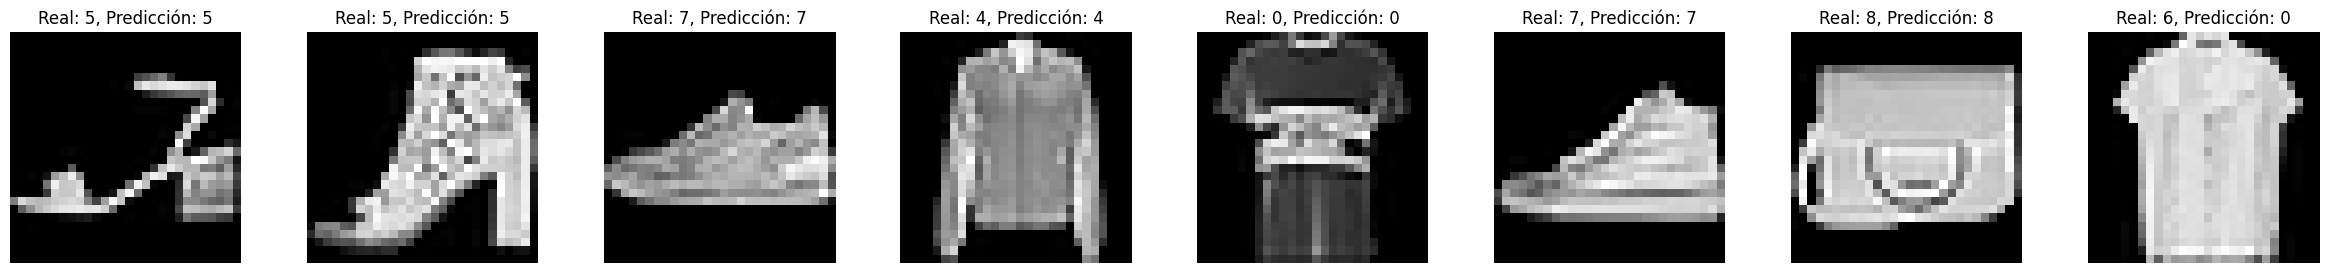

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

predictions = vit_model.predict(x_test.reshape(-1, 28*28))

# Elegir aleatoriamente imágenes y sus etiquetas reales y predicciones
num_samples = 8
random_indices = np.random.choice(len(x_test), num_samples, replace=False)

plt.figure(figsize=(30, 3))
for i, idx in enumerate(random_indices, 1):
    plt.subplot(1, num_samples, i)
    plt.imshow(x_test[idx, ..., 0], cmap='gray')
    plt.title(f'Real: {y_test[idx]}, Predicción: {np.argmax(predictions[idx])}')
    plt.axis('off')

plt.show()